### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")
training_df, val_df, test_df = split_dataset(ETTh2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 96
future_steps = round(48)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]

#### ETTh2

#### RLinear

Random seed set as 42
Rlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 19.713981169700624

Epoch 0: 

Train metrics: -------
Running (training) loss is 19.59614268728396.
Training MAE is 1.2253872447525227.
Training MSE is 20.358674163495156.
Training MAPE is 364966584.9844736.

Val metrics: -------
Running (validation) loss is 16.648538208689008.
Validation MAE is 1.1433223686899459.
Validation MSE is 17.43383721283504.
Validation MAPE is 0.035747078207454513.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 11.732386539745331

Epoch 1: 

Train metrics: -------
Running (training) loss is 12.388234241150437.
Training MAE is 0.9866208302111347.
Training MSE is 13.241051483065748.
Training MAPE is 345818872.677036.

Val metrics: -------
Running (validation) loss is 10.379825976576123.
Validation MAE is 0.9157663261890412.
Validation MSE is 11.183907809598105.
Validation MAPE is 0.028004871364682913.
----------------

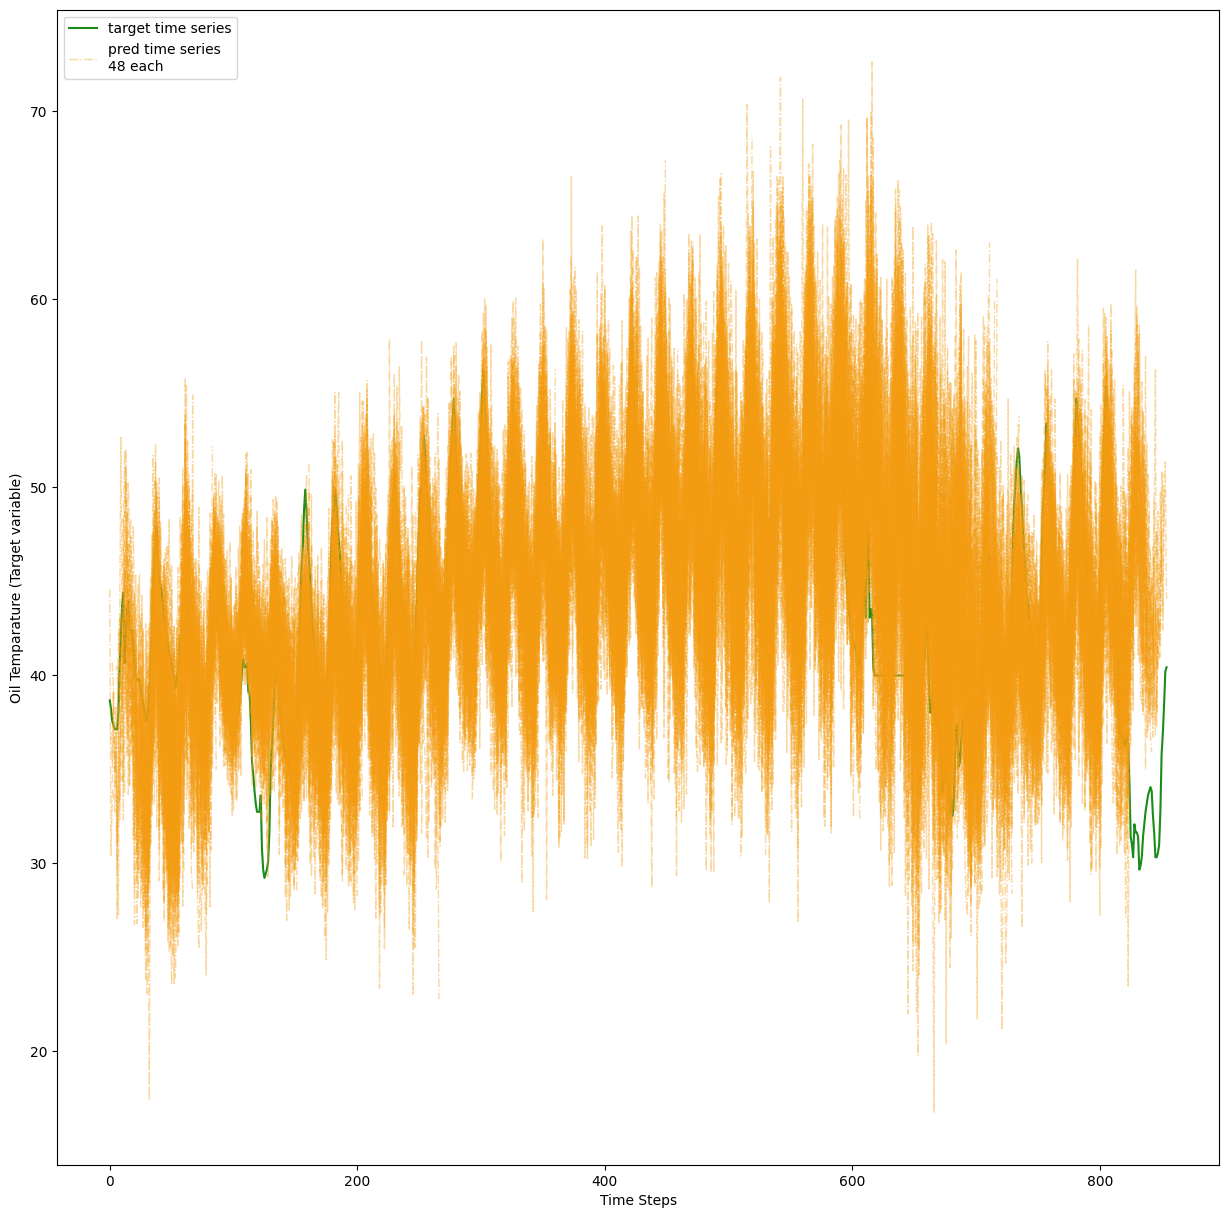

In [4]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

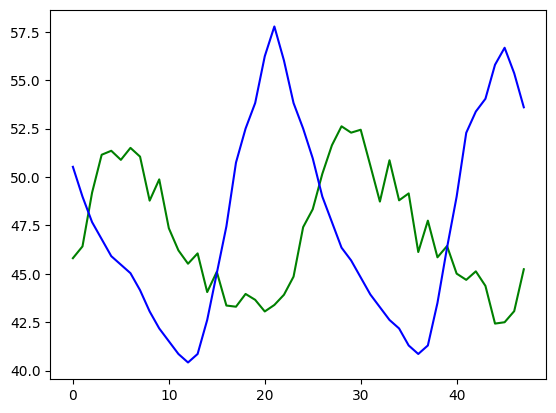

In [5]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 50: 
        break
    else: 
        output = neti(inputs)

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 16.539026416015624

Epoch 0: 

Train metrics: -------
Running (training) loss is 16.442672399203868.
Training MAE is 1.131057181564214.
Training MSE is 16.977002157142234.
Training MAPE is 379841308.8113061.

Val metrics: -------
Running (validation) loss is 23.511339492797852.
Validation MAE is 1.4142380109855106.
Validation MSE is 24.289165464128768.
Validation MAPE is 0.04561099912971258.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 12.708392868804932

Epoch 1: 

Train metrics: -------
Running (training) loss is 14.725497084629126.
Training MAE is 1.0705589815323953.
Training MSE is 15.532149122285976.
Training MAPE is 346212931.0785012.

Val metrics: -------
Running (validation) loss is 22.527750361306328.
Validation MAE is 1.373308822938374.
Validation MSE is 23.28796090398516.
Validation MAPE is 0.04568940503256662.
------------------

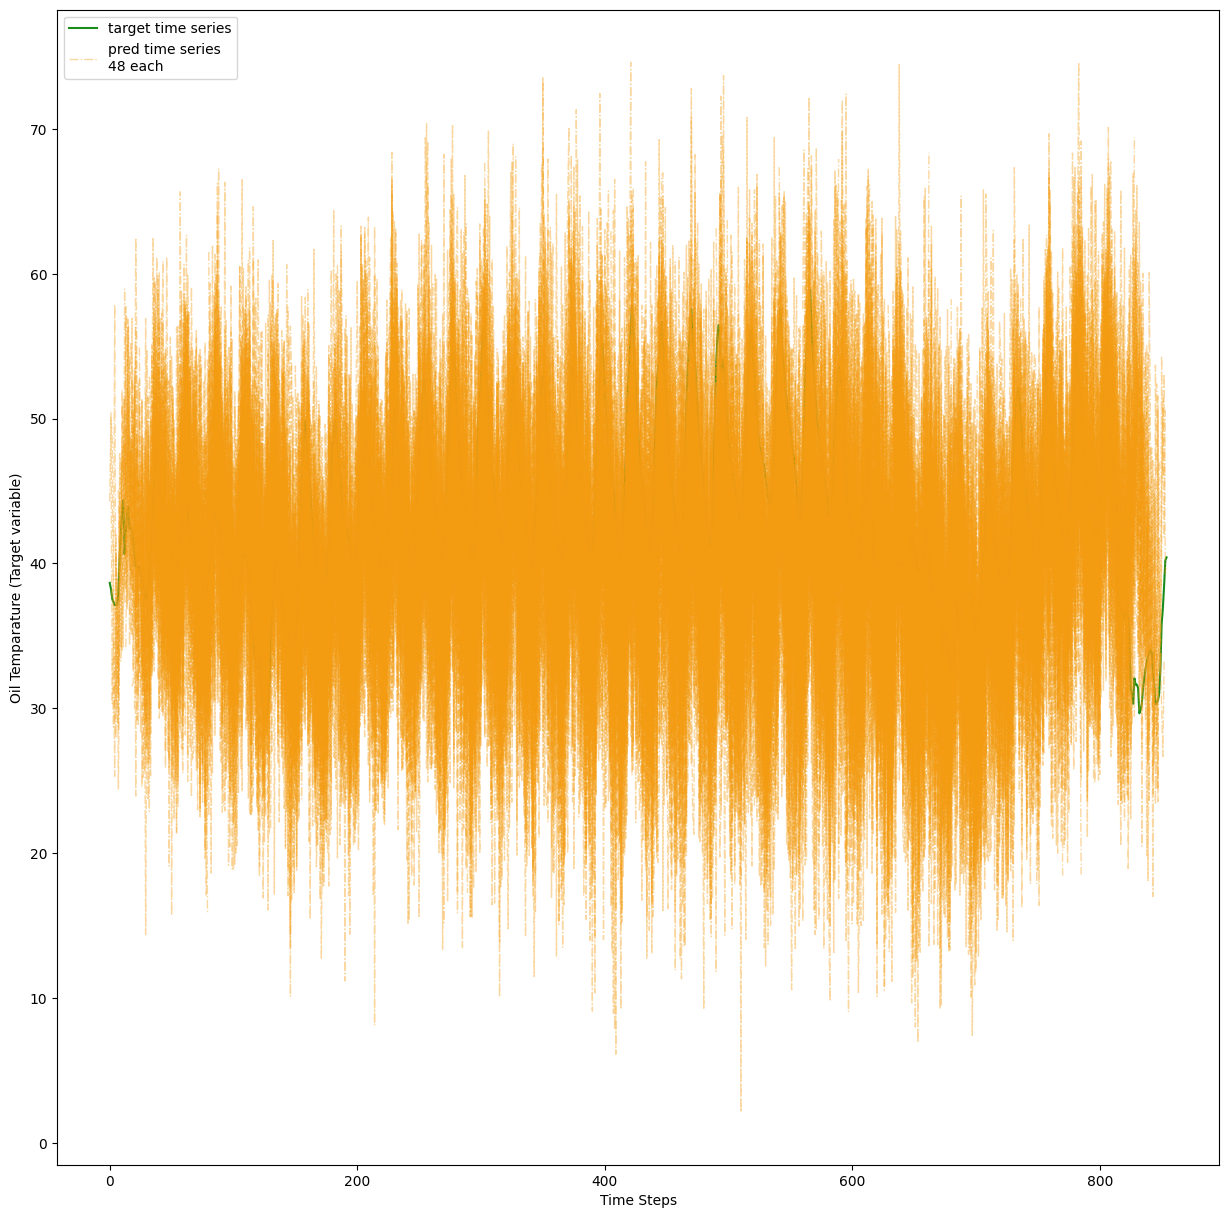

In [6]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 28.91304548931122

Epoch 0: 

Train metrics: -------
Running (training) loss is 23.746631164183302.
Training MAE is 1.3279422214159615.
Training MSE is 24.5211912882804.
Training MAPE is 412174204.8506936.

Val metrics: -------
Running (validation) loss is 17.181579457010542.
Validation MAE is 1.1629415065050126.
Validation MSE is 17.882500883511135.
Validation MAPE is 0.03673358550827418.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 9.089092191696167

Epoch 1: 

Train metrics: -------
Running (training) loss is 9.47883621419926.
Training MAE is 0.8762170972791997.
Training MSE is 10.272281296848698.
Training MAPE is 357522849.4366618.

Val metrics: -------
Running (validation) loss is 8.5480143897874.
Validation MAE is 0.8343484898975917.
Validation MSE is 9.302918984549386.
Validation MAPE is 0.0264432135916182.
--------------------------

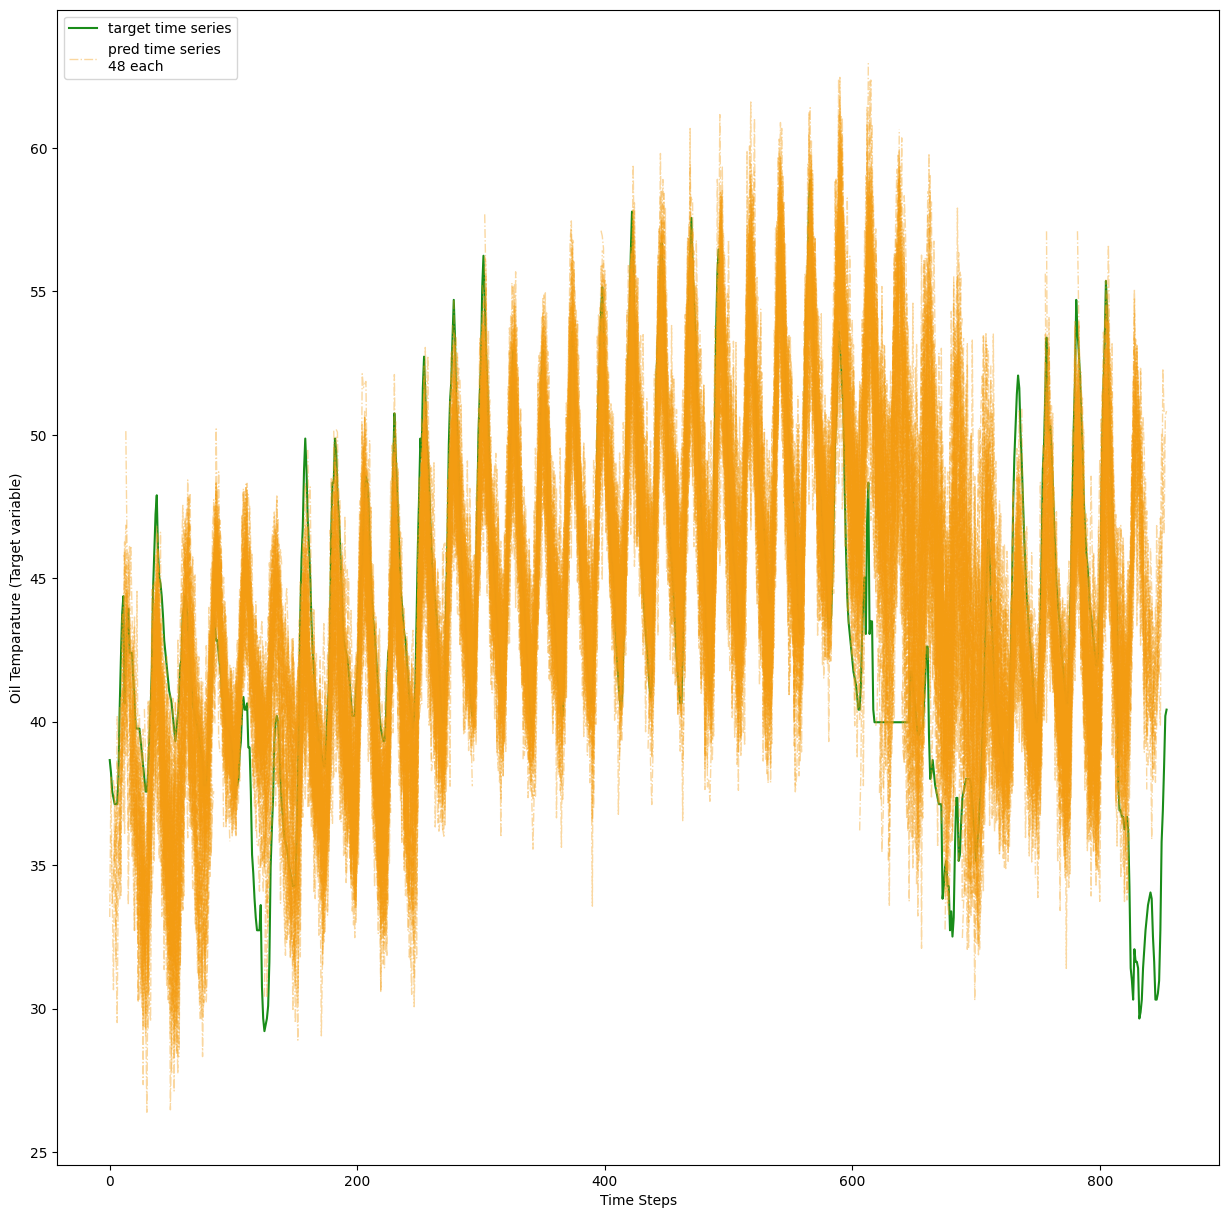

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)